<a href="https://colab.research.google.com/github/URK-KIPLiIS/Python-lessons/blob/main/Listy_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Listy 2D w Pythonie

* Krzysztof Molenda, 2023-03-25

2-wymiarowe struktury danych w Pythonie można zbudować na kilka sposobów. Natywną formą są listy list (listy zagnieżdżone w listach). Inne biblioteki języka (np. numpy) wprowadzają bardziej ogólne podejście. 

## Lista list

_Lista-list_ to lista, w której każdy element również jest listą. W ten sposób możemy zbudować tablicę dwuwymiarową.

In [ ]:
# lista składająca się z 3 wierszy, każdy wiersz składa się z 2 elementów
# można ją utożsamiać z tablicą dwuwymiarową 3x2 
tab = [[1, 2], [4, 5], [7, 8]]

Na poniższym rysunku zaprezentowano organizację wewnętrzną listy list. Zmienna `tab` wskazuje na listę 3-elementową. Każdy element tej listy jest listą 2-elementową. ([Wizualizacja na pythontutor.com](https://pythontutor.com/visualize.html#code=tab%20%3D%20%5B%5B1,%202%5D,%20%5B4,%205%5D,%20%5B7,%208%5D%5D&cumulative=false&curInstr=1&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false))

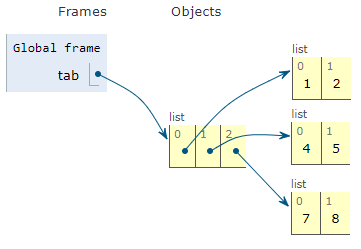

Do elementów tak zbudowanej tablicy możemy odwoływać się za pomocą indeksów. Indeks pierwszego wymiaru odpowiada numerowi wiersza, a drugiego wymiaru - numerowi kolumny:

In [ ]:
print(f"tab[0][0] = {tab[0][0]}") # pierwszy wiersz, pierwsza kolumna
print(f"tab[2][1] = {tab[2][1]}") # trzeci wiersz, druga kolumna
print(f"tab[1][2] = {tab[1][2]}") # drugi wiersz, trzecia kolumna <-- błąd, nie ma takiej kolumny, IndexError

Dla tablicy `tab` możemy również odwoływać się do całych wierszy, za pomocą indeksu wiersza, ale nie do całych kolumn (wynika to bowiem z architektury tablicy dwuwymiarowej). W takim przypadku dostaniemy tablicę jednowymiarową.

In [ ]:
print(tab[1]) # wyświetla cały drugi wiersz

[4, 5]


Operowanie bezpośrednio na kolumnach możliwe jest w realizacji tablic 2D pakietu `numpy`.

Techniczne możliwe jest to również dla listy-list, jeśli wykonamy transpozycję tablicy, czyli zamienimy wiersze na kolumny i odwrotnie. Wtedy możemy odwoływać się do kolumn za pomocą indeksu kolumny.

In [ ]:
tab2 = [[tab[j][i] for j in range(len(tab))] for i in range(len(tab[0]))]
print(tab2)

[[1, 4, 7], [2, 5, 8]]


Ze względu na wewnętrzną architekturę tablic, możemy je podzielić na:

* tablice regularne, czyli takie, dla których każdy wiersz ma tę samą liczbę elementów (można je wtedy utożsamiać z tablicami prostokątnymi o wymiarach `n x m`)
* tablice nieregularne (postrzępione), czyli takie, dla których niektóre wiersze mogą mieć inną różną elementów

Przykładem tablicy nieregularnej jest np. poniższa tablica (stąd nazwa _postrzępiona_):

`tab1 = [[1, 2, 3], [4, 5], [6, 7, 8, 9], [3]]`

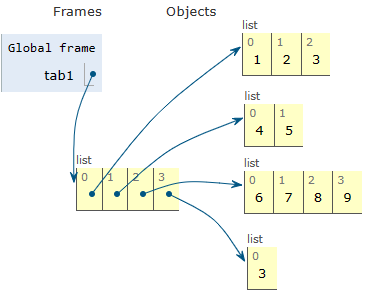

[Wizualizacja w pythontutor](https://pythontutor.com/visualize.html#code=tab1%20%3D%20%5B%5B1,%202,%203%5D,%20%5B4,%205%5D,%20%5B6,%207,%208,%209%5D,%20%5B3%5D%5D&cumulative=false&curInstr=1&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

Klasycznym sposobem przeglądania tablicy jest pętla `for` iterująca po wierszach, a wewnątrz niej kolejna pętla `for` iterująca po elementach wiersza (sposób ten jest bezpieczny zarówno dla tablic regularnych, jak i postrzępionych):

In [ ]:
for wiersz in tab:
    for element in wiersz:
        # wykonaj coś z elementem
        print(element, end=" ")
    print()

1 2 
4 5 
7 8 


Jeśli zależy nam na pozycji elementów w tablicy, musimy wykonać pętle `for` po indeksach wierszy i kolumn:

In [ ]:
for i in range(len(tab)):
    for j in range(len(tab[i])):
        # wykonaj coś z elementem tab[i][j]
        print(tab[i][j], end=" ")
    print()

1 2 
4 5 
7 8 


### Sytuacje specjalne

Tablice 2D postrzępione mogą przysporzyć kłopotów, jeśli mogą potencjalnie zawierać elementy lub całe wiersze puste - wymagają wtedy dodatkowej obsługi.

In [ ]:
tabX = [[125, None, 13], [124], None, [7008, 8]]
for wiersz in tabX:
    if wiersz is None:
        # wiersz jest pusty, obsłuż go specjalnie
        print("?")       
        continue
    for element in wiersz:
        if element is None:
            # element jest pusty, obsłuż go specjalnie
            print("?", end="\t")
            continue
        # wykonaj coś z elementem
        print(element, end="\t")
    print()

125	?	13	
124	
?
7008	8	


Do przeglądania tablic w Pythonie można wykorzystać wbudowaną funkcję `enumerate()`, która pozwala na iterację równocześnie po indeksach i wartościach elementów tablicy (_Pythonic way_):

In [ ]:
for x in enumerate(tabX):
    print(x, end=", ")
print()

(0, [125, None, 13]), (1, [124]), (2, None), (3, [7008, 8]), 


In [ ]:
for x in enumerate(tabX):
    for y in enumerate(x):
        print(y, end=", ")
print()

(0, 0), (1, [125, None, 13]), (0, 1), (1, [124]), (0, 2), (1, None), (0, 3), (1, [7008, 8]), 


In [ ]:
# wykorzystanie enumerate() do iterowania po indeksach i elementach
# z przeskakiwaniem pustych wierszy i elementów
for i, wiersz in enumerate(tabX):
    if wiersz is None:
        continue
    for j, element in enumerate(wiersz):
        if element is None:
            continue
        print(f"tabX[{i}][{j}] = {element}", end=", ")

tabX[0][0] = 125, tabX[0][2] = 13, tabX[1][0] = 124, tabX[3][0] = 7008, tabX[3][1] = 8, 

Aby ustalić liczbę niepustych elementów tablicy, nie można wywołać funkcji `len(tabX)` - ta zwróci długość listy zewnętrznej (umownie liczbę "wierszy"), tylko należy zsumować liczbę elementów we wszystkich wierszach. Należy pamiętać, że `None` nie jest liczbą, więc nie można go dodać do sumy (spowoduje zgłoszenie błędu):

In [ ]:
tabX = [[1, None, 3], [4], None, [7, 8]]

print(len(tabX)) # 4, zwraca wielkość listy zewnętrznej

# zliczanie niepustych elementów w tablicy
licznik = 0
for wiersz in tabX:
    if wiersz is None:
        continue
    for element in wiersz:
        if element is None:
            continue
        licznik += 1    
print(licznik) # 5, zwraca faktyczną liczbę niepustych elementów tablicy

4
5


### Generowanie tablic 2D

Generowanie tablicy 2D o z góry ustalonym rozmiarze oraz określonymi wartościami początkowymi za pomocą wytwornika list (_list comprehension_):

In [ ]:
# generowanie tablicy 2D o rozmiarze 3x4 wypełnionej wartościami 1
tab = [[1 for j in range(4)] for i in range(3)]
print(tab)

[[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]


> :warning: konstruowanie tablicy 2D przy użyciu multiplikacji (operator `*`) nie zawsze jest poprawne.

In [ ]:
tab1 = [ [1]*4 for i in range(3) ]
print(tab1)

tab2 = [ [1]*4 ]*3
print(tab2)

[[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
[[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]


> Na pierwszy rzut oka wszystkie trzy metody produkują ten sam wynik. Jednakże zmiany pojawiają się w trakcie eksploatacji tych tablic (modyfikacji zawartości):

In [ ]:
tab[0][0] = 0
print(tab)

tab1[0][0] = 0
print(tab1)

tab2[0][0] = 0
print(tab2)

[[0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
[[0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
[[0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]]


> O ile w przypadku `tab` oraz `tab1` wyniki są identyczne, o tyle w `tab2` zmiana wartości w jednym miejscu wpływa na inne elementy tablicy. Różnicę w działaniu można wyjaśnić na podstawie poniższego schematu:

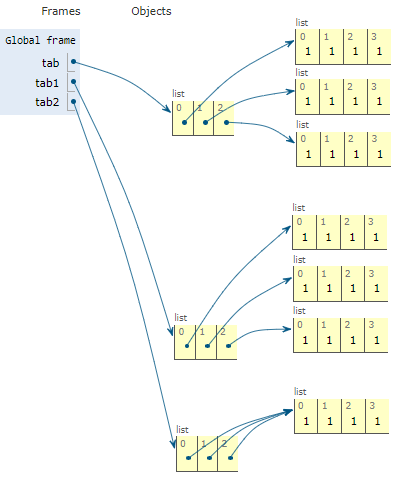

[Wizualizacja na pythontutor](https://pythontutor.com/visualize.html#code=tab%20%3D%20%20%5B%20%5B1%20for%20j%20in%20range%284%29%5D%20for%20i%20in%20range%283%29%20%5D%0Atab1%20%3D%20%5B%20%5B1%5D*4%20for%20i%20in%20range%283%29%20%5D%0Atab2%20%3D%20%5B%20%5B1%5D*4%20%5D*3&cumulative=false&curInstr=36&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)


In [ ]:
# generowanie tablicy kwadratowej 2D o rozmiarze 4 
# wypełnionej wartościami 1 na przekątnej i zerami w pozostałych miejscach
# macierz identycznościowa
tab = [[1 if i == j else 0 for j in range(4)] for i in range(4)]
print(tab)

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


In [ ]:
def RysujPlansze(tab) -> None:
    '''Funkcja wypisuje tablicę 2D znaków'''
    for wiersz in tab:
        for element in wiersz:
            print(element, end="")
        print()

In [ ]:
# generowanie planszy 2D o rozmiarze n wypełnionej `*` i '.' 
# tworzących określony wzorek opisany warunkiem logicznym
n = 4
zakres = range(n)
tab = [['*' if i >= j else '.' for j in zakres] for i in zakres]
RysujPlansze(tab)

*...
**..
***.
****


## Przykłady wykorzystania tablic 2D

Tablice 2D są wykorzystywane w wielu problemach, np. 
* do reprezentacji grafów (tzw. tablica sąsiedztwa opisuje konfigurację grafu skierowanego i nieskierowanego)
* do reprezentacji plansz gier (np. w grach typu "kółko i krzyżyk")
* do reprezentacji grafiki rastrowej (np. w programach graficznych)
* ...

## Tablice 2D w innych bibliotekach Pythona

### Tablice 2D w NumPy

### Tablice 2D w Pandas

### Tablice 2D w SciPy